# Cloth Parsing

In [ ]:
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
from os.path import basename
import shutil
import random
import os
import h5py
from PIL import Image
import pandas as pd
from glob import glob
import pickle

!apt install -y caffe-cuda
!pip install pydensecrf

import caffe
from pydensecrf import densecrf as dcrf
from pydensecrf.utils import compute_unary, create_pairwise_bilateral, create_pairwise_gaussian, softmax_to_unary
import skimage.io as io

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!git clone https://github.com/bearpaw/clothing-co-parsing.git
data_path = '/content/clothing-co-parsing/'

Cloning into 'clothing-co-parsing'...
remote: Enumerating objects: 4234, done.
remote: Total 4234 (delta 0), reused 0 (delta 0), pack-reused 4234
Receiving objects: 100% (4234/4234), 124.59 MiB | 12.20 MiB/s, done.
Resolving deltas: 100% (1100/1100), done.


In [ ]:
loadmat(data_path+'annotations/pixel-level/0001.mat')

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Aug 19 15:20:27 2014',
 '__version__': '1.0',
 'groundtruth': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

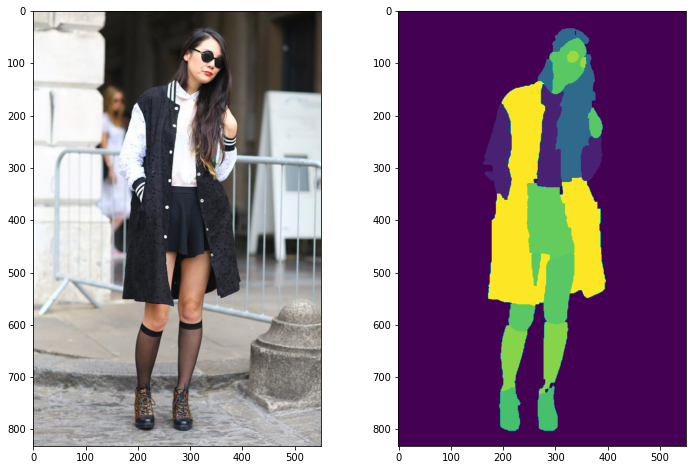

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
img1 = Image.open(data_path+'photos/0001.jpg')
plt.imshow(img1)

plt.subplot(1, 2, 2)
mask1 = loadmat(data_path+'annotations/pixel-level/0001.mat')['groundtruth']
plt.imshow(mask1)

plt.show()

In [ ]:
# reading names of categories in the ccp dataset and saving it as csv
labels = loadmat(data_path+'label_list.mat')
ccp_categories = []
for i in labels['label_list'][0]:
    ccp_categories.append(str(i[0]))
color_map = pd.Series(ccp_categories)
color_map

0            null
1     accessories
2             bag
3            belt
4          blazer
5          blouse
6        bodysuit
7           boots
8             bra
9        bracelet
10           cape
11       cardigan
12          clogs
13           coat
14          dress
15       earrings
16          flats
17        glasses
18         gloves
19           hair
20            hat
21          heels
22         hoodie
23       intimate
24         jacket
25          jeans
26         jumper
27       leggings
28        loafers
29       necklace
30        panties
31          pants
32          pumps
33          purse
34           ring
35         romper
36        sandals
37          scarf
38          shirt
39          shoes
40         shorts
41           skin
42          skirt
43       sneakers
44          socks
45      stockings
46           suit
47     sunglasses
48        sweater
49     sweatshirt
50       swimwear
51        t-shirt
52            tie
53         tights
54            top
55        